In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('../../TensorFlow_FILES/DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


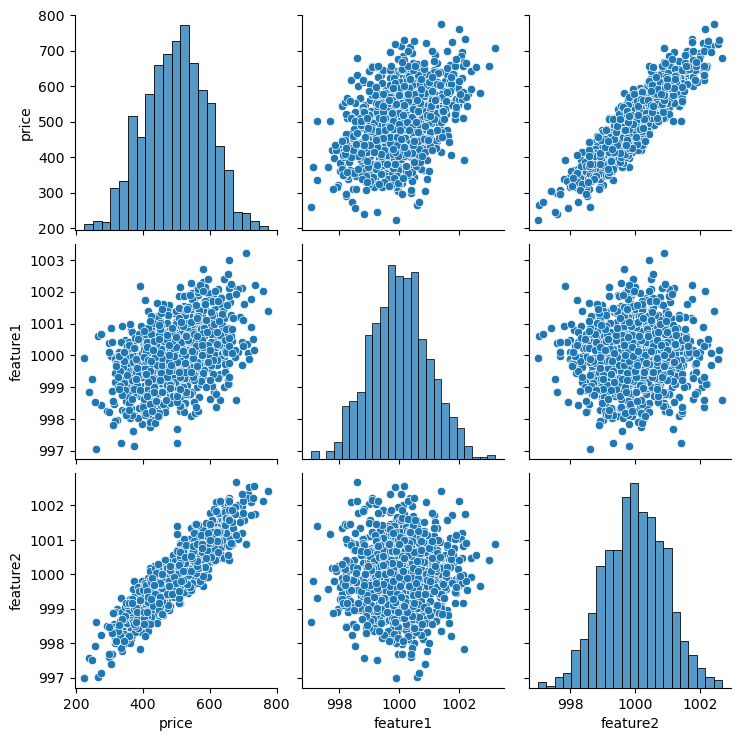

In [21]:
sns.pairplot(df)

In [22]:

X = df[['feature1', 'feature2']].values
y = df['price'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train.shape

(700, 2)

In [8]:
X_test.shape

(300, 2)

In [10]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train = scaler.transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
X_train.max()

1.0

In [21]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [26]:
model.fit(x=X_train, y=y_train, epochs=250,verbose=1)

Epoch 1/250
22/22 [==============================] - 0s 677us/step - loss: 24.2140
Epoch 2/250
22/22 [==============================] - 0s 525us/step - loss: 24.0115
Epoch 3/250
22/22 [==============================] - 0s 434us/step - loss: 24.0639
Epoch 4/250
22/22 [==============================] - 0s 363us/step - loss: 23.8908
Epoch 5/250
22/22 [==============================] - 0s 418us/step - loss: 24.2376
Epoch 6/250
22/22 [==============================] - 0s 359us/step - loss: 24.1461
Epoch 7/250
22/22 [==============================] - 0s 430us/step - loss: 24.0189
Epoch 8/250
22/22 [==============================] - 0s 381us/step - loss: 23.9727
Epoch 9/250
22/22 [==============================] - 0s 388us/step - loss: 24.0875
Epoch 10/250
22/22 [==============================] - 0s 428us/step - loss: 23.9859
Epoch 11/250
22/22 [==============================] - 0s 361us/step - loss: 23.7414
Epoch 12/250
22/22 [==============================] - 0s 436us/step - loss: 23.9879
E

In [28]:
loss_df  = pd.DataFrame(model.history.history)

<Axes: >

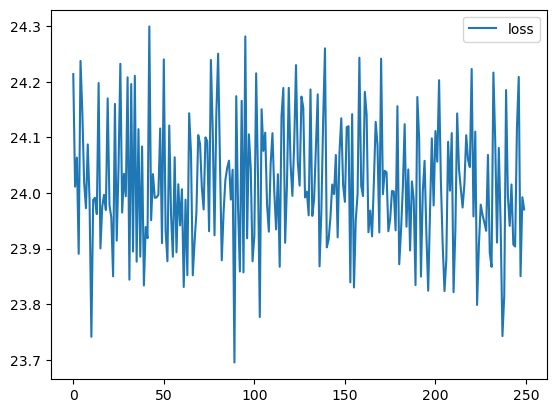

In [29]:
loss_df.plot()

In [30]:
model.evaluate(X_test, y_test, verbose=0)

25.66503143310547

In [31]:
model.evaluate(X_train, y_train, verbose=0)

23.886930465698242

In [32]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 384us/step


In [33]:
test_predictions

array([[405.8319 ],
       [624.4721 ],
       [593.0097 ],
       [573.0633 ],
       [367.0826 ],
       [580.0315 ],
       [515.7844 ],
       [459.74887],
       [550.0413 ],
       [448.14087],
       [612.6975 ],
       [549.75183],
       [419.66632],
       [409.4168 ],
       [652.2313 ],
       [437.90076],
       [509.1849 ],
       [660.9234 ],
       [663.58356],
       [566.3692 ],
       [334.63925],
       [445.44647],
       [383.02542],
       [379.25018],
       [567.4256 ],
       [611.49817],
       [533.15955],
       [428.4437 ],
       [656.43005],
       [414.64236],
       [443.24805],
       [485.81323],
       [439.01657],
       [682.8823 ],
       [425.33966],
       [418.24783],
       [502.65024],
       [551.2782 ],
       [510.4574 ],
       [395.87524],
       [619.5168 ],
       [417.19318],
       [605.3494 ],
       [446.58014],
       [502.70447],
       [582.5816 ],
       [670.02106],
       [491.10037],
       [318.96954],
       [486.11252],


In [34]:

test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      405.831909
1      624.472107
2      593.009705
3      573.063293
4      367.082611
          ...    
295    529.805420
296    516.059082
297    610.560120
298    417.521362
299    411.425323
Length: 300, dtype: float32

In [43]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [44]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [45]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

pred_df

,Test True Y,0
0,402.296319,405.831909
1,624.156198,624.472107
2,582.455066,593.009705
3,578.588606,573.063293
4,371.224104,367.082611
...,...,...
295,525.704657,529.805420
296,502.909473,516.059082
297,612.727910,610.560120
298,417.569725,417.521362


In [46]:
pred_df.columns = ['Test True Y', 'Model Predictions']

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

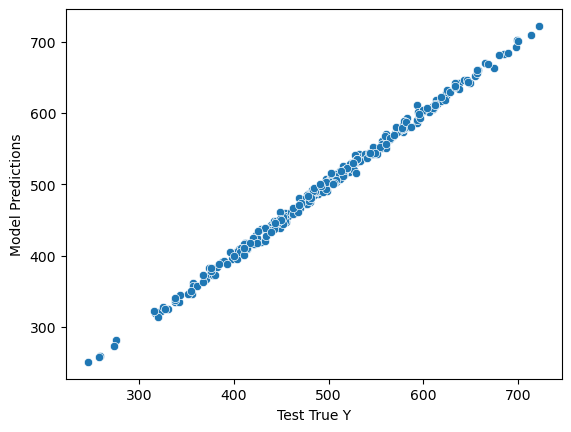

In [48]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [51]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.087069699482172

In [52]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [53]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.66503419125471

In [54]:
new_gem = [[998, 1000]]

In [56]:
new_gem = scaler.transform(new_gem)

In [57]:
model.predict(new_gem)

1/1 [==============================] - 0s 11ms/step


array([[420.2481]], dtype=float32)

In [59]:
model.save('my_gem_model.h5')

In [60]:
later_model = load_model('my_gem_model.h5')

In [61]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 33ms/step


array([[420.2481]], dtype=float32)

In [23]:
df = pd.read_csv('../../TensorFlow_FILES/DATA/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 1200x800 with 0 Axes>

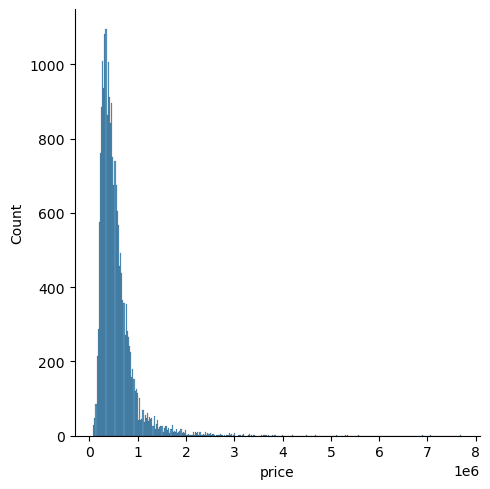

In [26]:
plt.figure(figsize=(12,8))

sns.displot(df['price'])

# plt.ticklabel_format(style='plain', axis='x',)



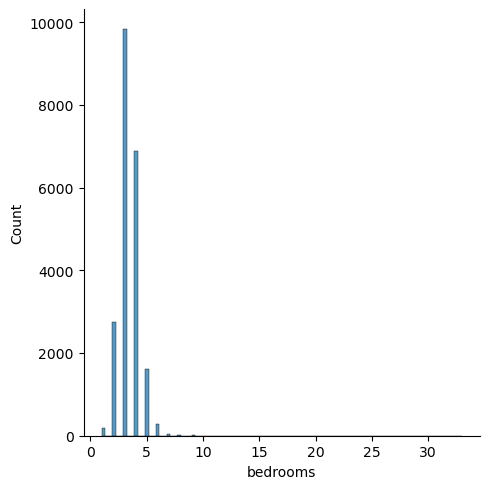

In [27]:
sns.displot(df['bedrooms'], bins=100)

In [28]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df.corr(numeric_only=True)['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

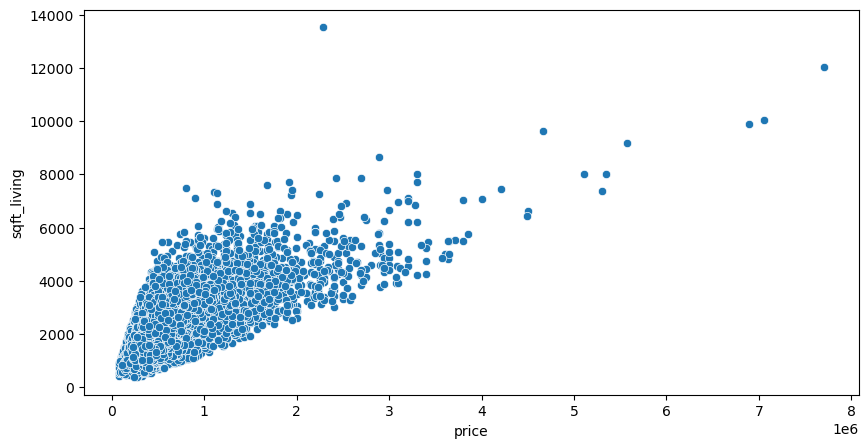

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

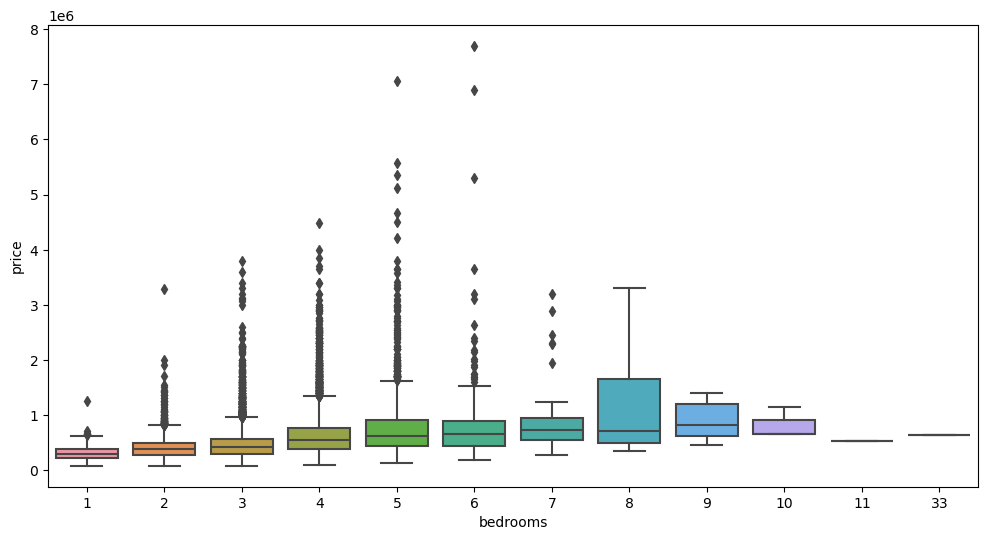

In [30]:
plt.figure(figsize=(12,6))

sns.boxplot(x='bedrooms', y='price', data=df)

<Axes: xlabel='price', ylabel='long'>

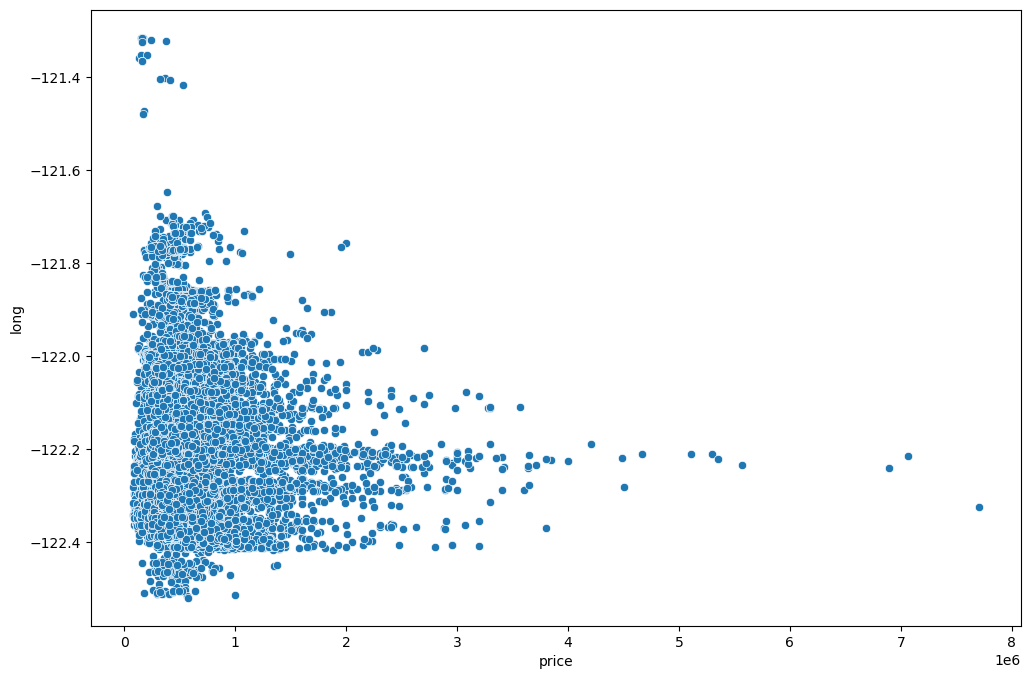

In [31]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='price', y='long', data=df)

<Axes: xlabel='price', ylabel='lat'>

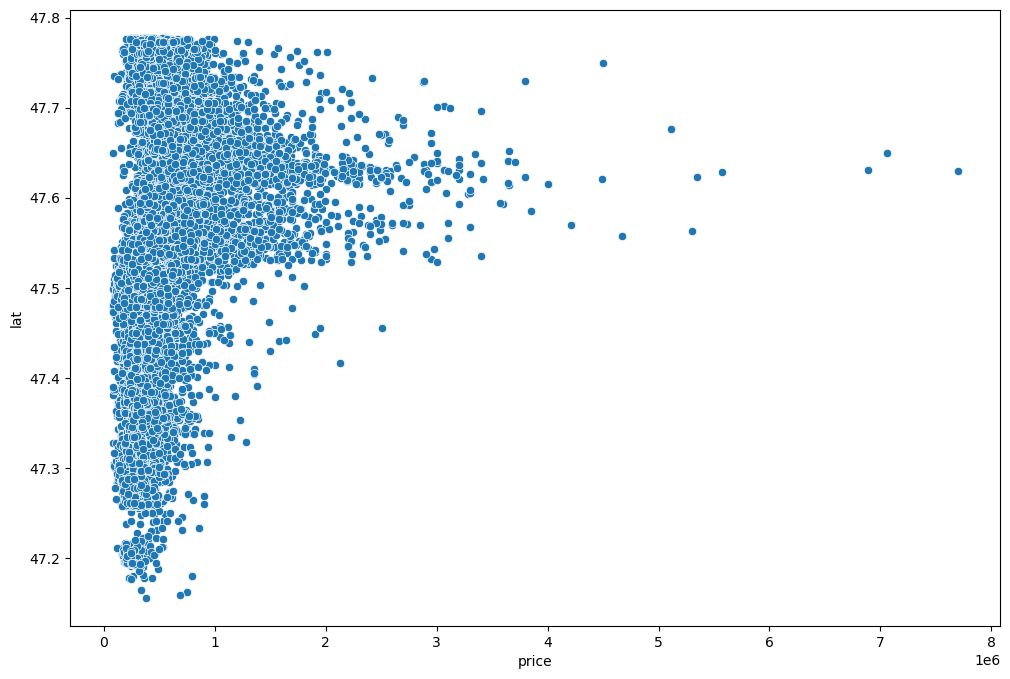

In [32]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='price', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

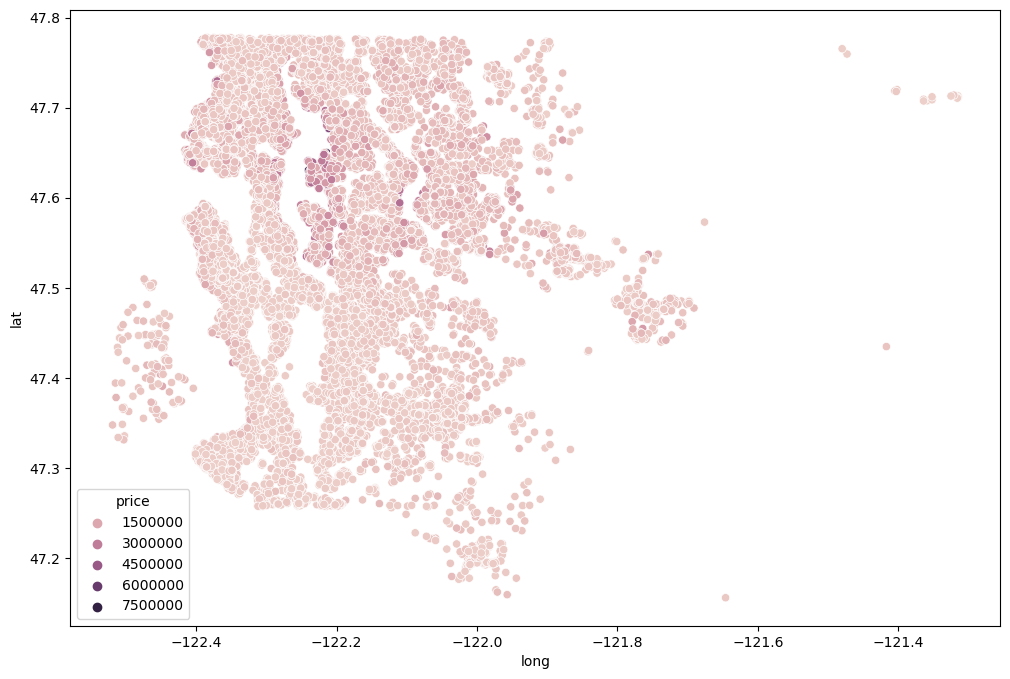

In [33]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [34]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [35]:
len(df) * 0.01 # top 1 percent

215.97

In [36]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

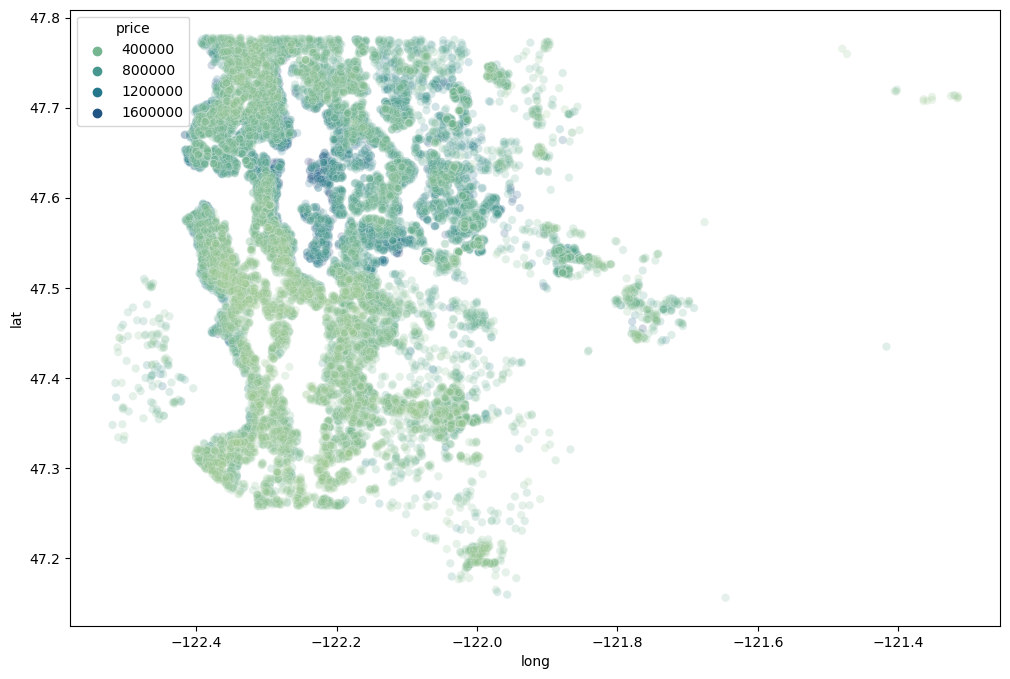

In [37]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='long', y='lat', data=non_top_1_perc,  hue='price', alpha=0.2, palette='crest')

<Axes: xlabel='waterfront', ylabel='price'>

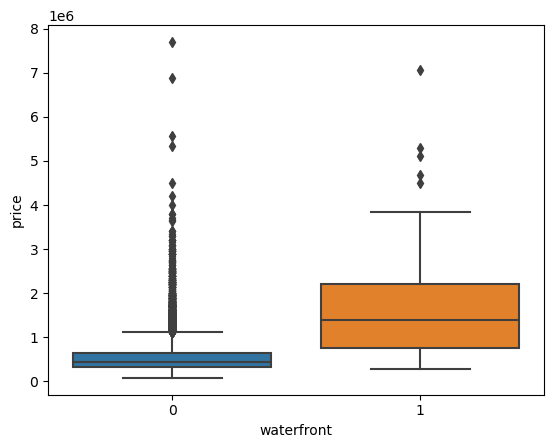

In [38]:
sns.boxplot(x='waterfront', y='price', data=df)

In [39]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
df = df.drop('id', axis=1)

In [41]:
df['date'] = pd.to_datetime(df['date'])

In [42]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [43]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [44]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

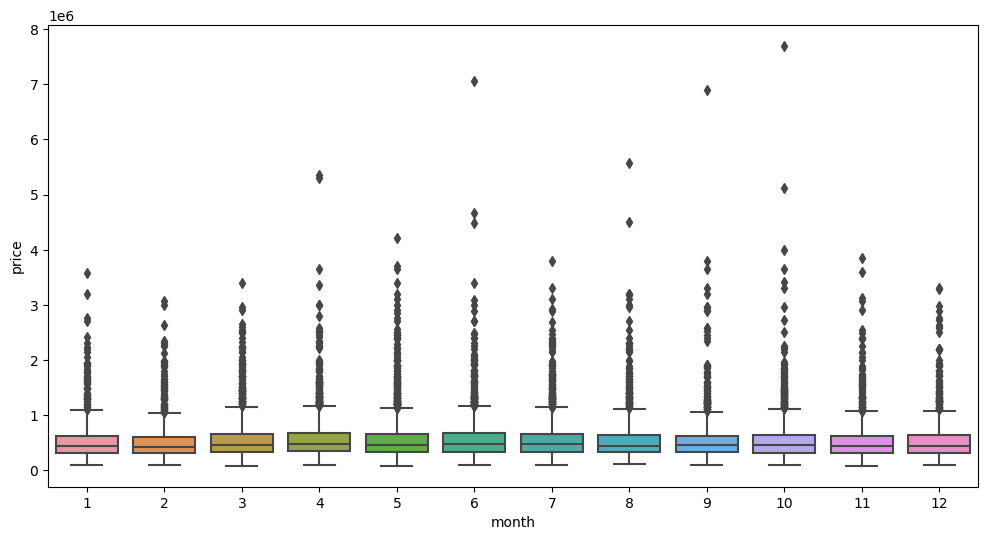

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='price', data=df)

<Axes: xlabel='month'>

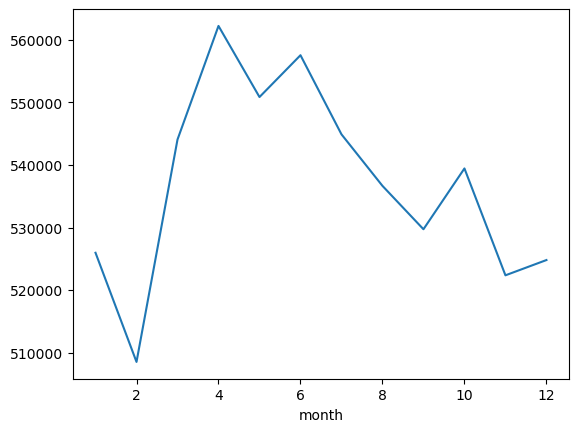

In [46]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

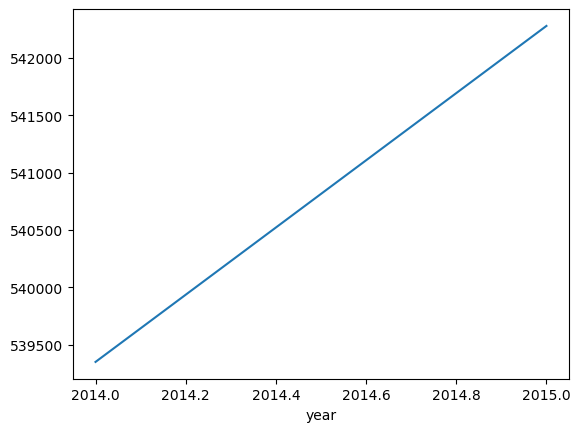

In [47]:
df.groupby('year').mean()['price'].plot()

In [48]:
df = df.drop('date', axis=1)

In [49]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [50]:
# df['zipcode'].value_counts()

In [51]:
df = df.drop('zipcode', axis=1)

In [52]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [54]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [55]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
X_train.shape

(15117, 19)

In [64]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))



model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [65]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test), 
          batch_size=128, epochs=400)

Epoch 1/400
  1/119 [..............................] - ETA: 18s - loss: 333733494784.0000

2024-02-19 18:28:39.601223: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


119/119 [==============================] - 0s 1ms/step - loss: 430240923648.0000 - val_loss: 418924265472.0000
Epoch 2/400
119/119 [==============================] - 0s 670us/step - loss: 429397540864.0000 - val_loss: 416006275072.0000
Epoch 3/400
119/119 [==============================] - 0s 664us/step - loss: 417060028416.0000 - val_loss: 386700869632.0000
Epoch 4/400
119/119 [==============================] - 0s 642us/step - loss: 350407262208.0000 - val_loss: 275537723392.0000
Epoch 5/400
119/119 [==============================] - 0s 647us/step - loss: 205309919232.0000 - val_loss: 128614621184.0000
Epoch 6/400
119/119 [==============================] - 0s 669us/step - loss: 109380272128.0000 - val_loss: 95976775680.0000
Epoch 7/400
119/119 [==============================] - 0s 648us/step - loss: 98322145280.0000 - val_loss: 94350032896.0000
Epoch 8/400
119/119 [==============================] - 0s 648us/step - loss: 96595050496.0000 - val_loss: 92874309632.0000
Epoch 9/400
119/119

In [67]:
losses = pd.DataFrame(model.history.history)

<Axes: >

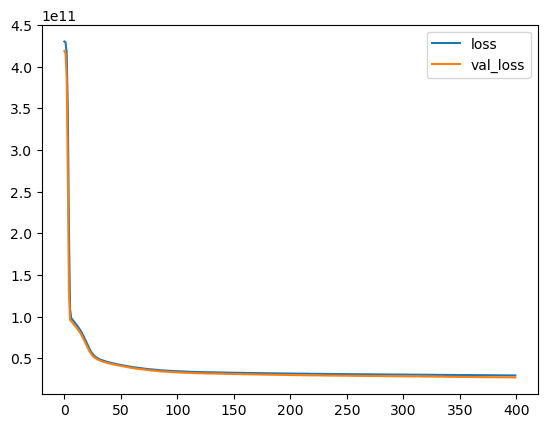

In [68]:
losses.plot()

In [70]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 265us/step


In [72]:
np.sqrt(mean_squared_error(y_test, predictions))

163941.47765625152

In [73]:
mean_absolute_error(y_test, predictions)

101175.5487581983

In [74]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [75]:
5.402966e+05

540296.6

In [76]:
explained_variance_score(y_test, predictions)

0.7975380122049581

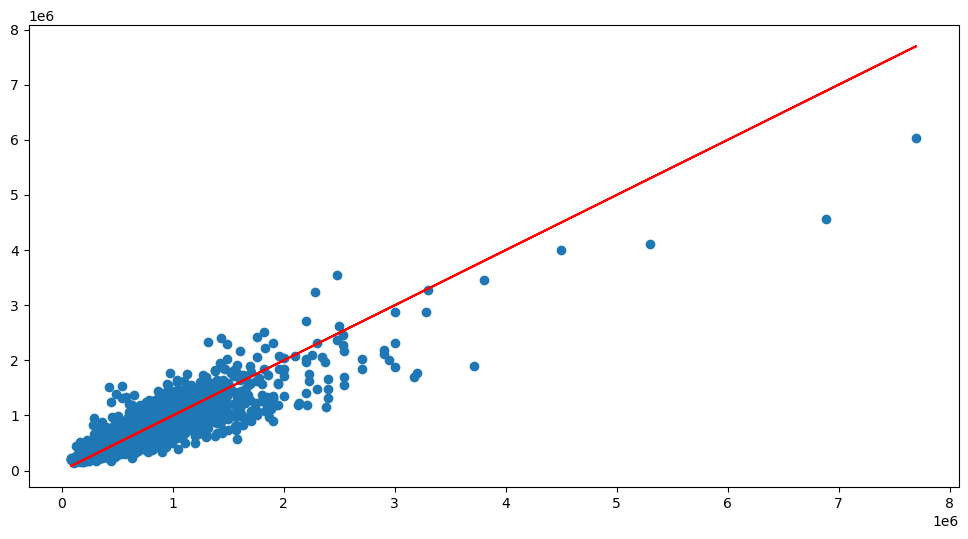

In [79]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [83]:
single_house = df.drop('price', axis=1).iloc[0]

In [86]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [87]:
model.predict(single_house)

1/1 [==============================] - 0s 18ms/step


array([[272321.47]], dtype=float32)

In [89]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
